In [251]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [324]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [325]:
NUM_CLASSES = 2

# 入力長

In [326]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [327]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [328]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [330]:
X_train.shape

(1500, 32)

In [331]:
import tensorflow as tf
from keras.layers import Dense, Dropout, LSTM,InputLayer,Reshape,Flatten
from keras import Sequential

#!Why is it not workinggggggg RAHHHH
#? model=Sequential()
#? model.add(InputLayer(input_shape=(TIME_STEPS * DIMENSION, )))
#? # model.add(Flatten())
#? model.add(Reshape((TIME_STEPS,DIMENSION),input_shape=(TIME_STEPS * DIMENSION, )))
#? # model.add(Dropout(0.2))
#? # model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=[TIME_STEPS,DIMENSION]))
#? # model.add(LSTM(128,return_sequences=True,activation='relu'))
#? model.add(LSTM(16,activation='relu'))
#? # model.add(Dense(64,activation='relu'))
#? model.add(Dense(10,activation='relu'))
#? model.add(Dense(NUM_CLASSES,activation='softmax'))

In [344]:
model=Sequential([
    InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(NUM_CLASSES,activation='softmax')
])

In [345]:
# use_lstm = True
# model = None

# if use_lstm:
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
#         tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(10, activation='relu'),
#         tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
#     ])
# else:
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(24, activation='relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(10, activation='relu'),
#         tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
#     ])


In [346]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 32)                0         
                                                                 
 dense_108 (Dense)           (None, 32)                1056      
                                                                 
 dense_109 (Dense)           (None, 2)                 66        
                                                                 
Total params: 1,122
Trainable params: 1,122
Non-trainable params: 0
_________________________________________________________________


In [347]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [348]:
# モデルコンパイル
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [349]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/12 [=>............................] - ETA: 3s - loss: nan - accuracy: 0.0000e+00
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
12/12 [==============================] - 1s 25ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/1000
12/12 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0000e+00
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
12/12 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/1000
 1/12 [=>............................] - ETA: 0s - loss: nan - accuracy: 0.0000e+00
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
12/12 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/1000
11/12 [==========================>...] - ETA: 0s - loss

In [338]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [339]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 1s 613ms/step
[nan nan]
0


# 混同行列

16/16 [==============================] - 0s 5ms/step


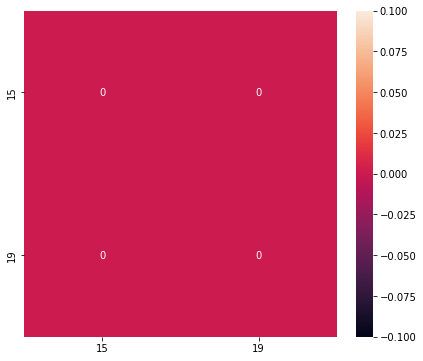

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00     275.0
          19       0.00      0.00      0.00     225.0

    accuracy                           0.00     500.0
   macro avg       0.00      0.00      0.00     500.0
weighted avg       0.00      0.00      0.00     500.0



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [340]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [341]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [342]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [343]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpxdu8058e\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpxdu8058e\assets


ConverterError: c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\saved_model\save.py:1268:0: error: 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\saved_model\save.py:1268:0: error: failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False


# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 510 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.8643499e-02 1.7121564e-01 1.8804336e-07 2.2132219e-01 3.0290168e-03
 3.4740522e-05 4.8657041e-03 1.7682862e-01 1.0381317e-04 4.8980098e-03
 7.8490935e-03 5.1522214e-04 2.4228403e-03 1.9061741e-01 2.8671004e-05
 1.0813470e-01 1.9079125e-05 1.6078406e-03 2.6700789e-06 2.4872745e-04
 3.0173933e-05 5.9396541e-05 2.7557481e-03 4.4761193e-03 8.8285971e-03
 5.4848095e-04 9.1381243e-04]
3
